In [2]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from transformers import pipeline
import feedparser

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
tokenizer = BertTokenizer.from_pretrained("yiyanghkust/finbert-tone")
finbert = BertForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone", num_labels=3)
nlp = pipeline("text-classification", model=finbert, tokenizer=tokenizer)

Device set to use mps:0


In [ ]:
keyword = 'Meta'
date = '2025-07-15'

API_KEY = open('API_KEY').read()

url = (
    'https://newsapi.org/v2/everything?'
    f'q={keyword}&'
    f'from={date}&'
    f'sortBy=popularity&'
    f'apiKey={"0c4769ca0c794abf903d6d47e5ba5703"}'
)

response =  requests.get(url)
response = requests.get(url)
data = response.json()
print(data)

articles = response.json()['articles']
articles = [article for article in articles if keyword.lower() in article['title'].lower() or keyword.lower() in article['description'].lower()]

total_score = 0
num_articles = 0

for i, article in enumerate(articles):
    print(f"Title: {article['title']}")x
    print(f"Link: {article["url"]}")
    print(f"Description: {article["description"]}")
    print("Number of articles: ", num_articles)

    sentiment = nlp(article["content"])[0]

    print(f'Sentiment: {sentiment['label']}, Score: {sentiment['score']:.2%}')
    print("-" * 50)

    if (sentiment['label'] == 'Positive'):
        total_score += sentiment['score']
        num_articles += 1
    elif (sentiment['label'] == 'Negative'):
        total_score -= sentiment['score']
        num_articles += 1

if num_articles == 0:
    print("Overall sentiment score: Neutral 0.00")
else:
    final_score = total_score / num_articles
    print(f"Overall sentiment score: {"Positive" if total_score >= 0.15 else "Negative" if total_score <= -0.15 else "Neutral"} {final_score} ")


{'status': 'ok', 'totalResults': 4371, 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Emma Roth', 'title': 'Xbox tests letting you stream your own games on PC', 'description': 'Xbox is bringing its “stream your own game” feature to PC. On Tuesday, the company announced that Xbox Insiders with a Game Pass Ultimate subscription can try streaming the Xbox games they own, including some that are available on console only, directly from …', 'url': 'https://www.theverge.com/news/707739/xbox-stream-your-own-game-pc-app', 'urlToImage': 'https://platform.theverge.com/wp-content/uploads/sites/2/2025/07/stream-your-own-game-pc.png?quality=90&strip=all&crop=0%2C3.4613147178592%2C100%2C93.077370564282&w=1200', 'publishedAt': '2025-07-15T20:25:26Z', 'content': 'That includes titles available on console only.\r\nThat includes titles available on console only.\r\nXbox is bringing its stream your own game feature to PC. On Tuesday, the company announced that Xbox … [+915 c

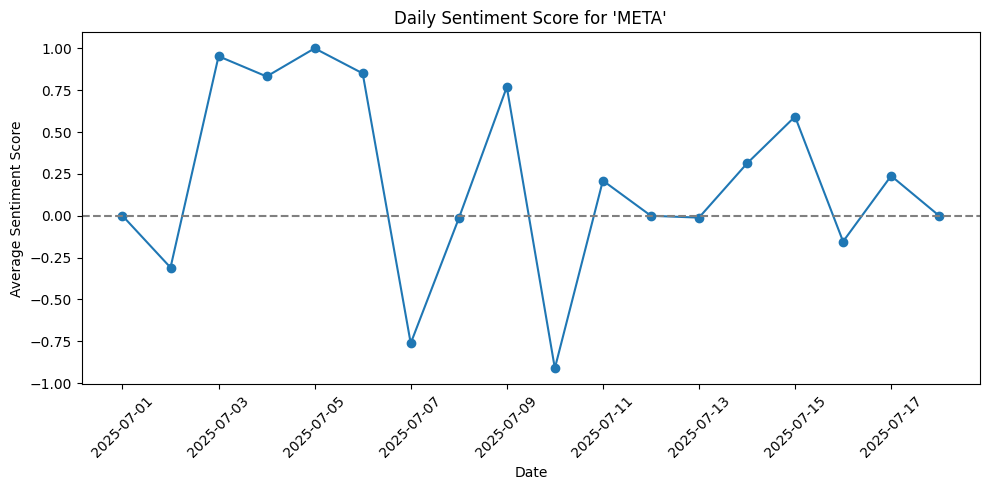

In [20]:
import requests
import datetime
import matplotlib.pyplot as plt

# Your keyword and date range
keyword = 'META'
start_date = datetime.date(2025, 7, 1)
end_date = datetime.date(2025, 7, 18)  # Example: 1 week

# Read your NewsAPI key from file
API_KEY = "0c4769ca0c794abf903d6d47e5ba5703"

# Prepare date list
date_list = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]
daily_scores = []

for date in date_list:
    url = (
        'https://newsapi.org/v2/everything?'
        f'q={keyword}&'
        f'from={date}&to={date}&'
        f'sortBy=popularity&'
        f'apiKey={"0c4769ca0c794abf903d6d47e5ba5703"}'
    )
    response = requests.get(url)
    data = response.json()
    articles = data.get('articles', [])
    # Filter articles containing the keyword in title or description
    articles = [
    article for article in articles
    if keyword.lower() in (article.get('title') or '').lower()
    or keyword.lower() in (article.get('description') or '').lower()
    ]

    total_score = 0
    num_articles = 0

    for article in articles:
        content = article.get("content", "")
        if not content:
            continue
        sentiment = nlp(content)[0]
        if sentiment['label'] == 'Positive':
            total_score += sentiment['score']
            num_articles += 1
        elif sentiment['label'] == 'Negative':
            total_score -= sentiment['score']
            num_articles += 1
        # Neutral does not affect total_score

    if num_articles == 0:
        avg_score = 0
    else:
        avg_score = total_score / num_articles
    daily_scores.append(avg_score)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(date_list, daily_scores, marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title(f"Daily Sentiment Score for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import yfinance as yf

stockData = yf.download('META', start='2025-07-01', end='2025-07-19')

print(stockData)


/var/folders/g2/931w9w_d60v_jl094bn3frh00000gp/T/ipykernel_1194/2939083720.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stockData = yf.download('META', start='2025-07-01', end='2025-07-19')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            META        META        META        META      META
Date                                                                
2025-07-01  719.219971  737.750000  715.369995  736.880005  13431200
2025-07-02  713.570007  720.299988  712.799988  715.330017   9336700
2025-07-03  719.010010  729.030029  714.419983  726.609985   8601700
2025-07-07  718.349976  727.000000  713.510010  717.599976   9457100
2025-07-08  720.669983  722.909973  714.809998  721.570007   7770700
2025-07-09  732.780029  737.530029  722.719971  722.719971  11418000
2025-07-10  727.239990  735.799988  719.599976  731.549988   9913600
2025-07-11  717.510010  725.159973  709.700012  722.500000  10873900
2025-07-14  720.919983  728.000000  716.549988  717.599976   8939400
2025-07-15  710.390015  724.469971  709.820007  723.900024  11529500
2025-07-16  702.909973  713.969971  699.270020  713.369995  13067600
2025-07-17  701.409973  705.900024

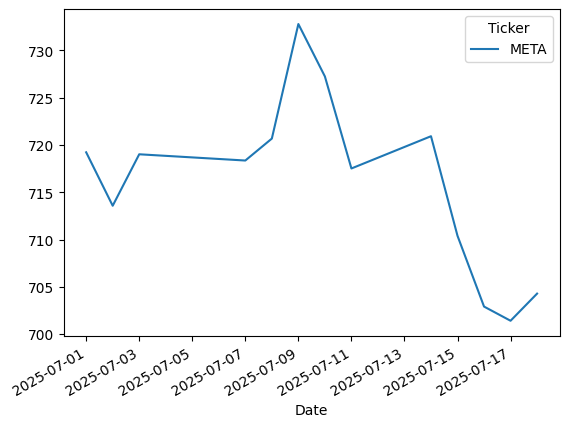

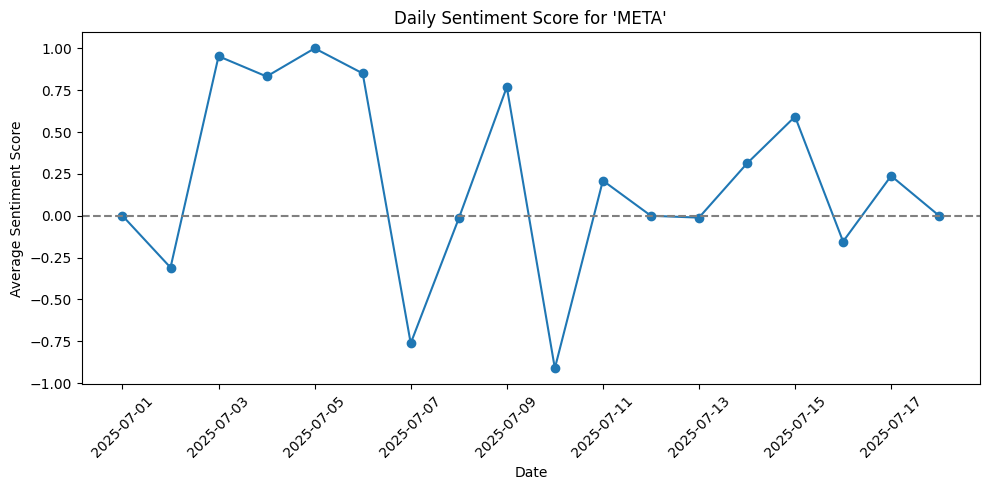

In [38]:
stock_prices = stockData['Close']
stockData['Close'].plot()
plt.show()

import requests
import datetime
import matplotlib.pyplot as plt

# Your keyword and date range
keyword = 'META'
start_date = datetime.date(2025, 7, 1)
end_date = datetime.date(2025, 7, 18)  # Example: 1 week

# Read your NewsAPI key from file
API_KEY = "0c4769ca0c794abf903d6d47e5ba5703"

# Prepare date list
date_list = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]
daily_scores = []

for date in date_list:
    url = (
        'https://newsapi.org/v2/everything?'
        f'q={keyword}&'
        f'from={date}&to={date}&'
        f'sortBy=popularity&'
        f'apiKey={"0c4769ca0c794abf903d6d47e5ba5703"}'
    )
    response = requests.get(url)
    data = response.json()
    articles = data.get('articles', [])
    # Filter articles containing the keyword in title or description
    articles = [
    article for article in articles
    if keyword.lower() in (article.get('title') or '').lower()
    or keyword.lower() in (article.get('description') or '').lower()
    ]

    total_score = 0
    num_articles = 0

    for article in articles:
        content = article.get("content", "")
        if not content:
            continue
        sentiment = nlp(content)[0]
        if sentiment['label'] == 'Positive':
            total_score += sentiment['score']
            num_articles += 1
        elif sentiment['label'] == 'Negative':
            total_score -= sentiment['score']
            num_articles += 1
        # Neutral does not affect total_score

    if num_articles == 0:
        avg_score = 0
    else:
        avg_score = total_score / num_articles
    daily_scores.append(avg_score)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(date_list, daily_scores, marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title(f"Daily Sentiment Score for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()